<a href="https://colab.research.google.com/github/BaronAWC95014/python_class_instructor/blob/main/day7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Default Parameters

You can specify default values for input arguments to a function. Their default values are utilized if a user does not specify these inputs when calling the function. Recall our `count_vowels` function. Suppose we want the ability to include “y” as a vowel. We know, however, that people will typically want to exclude “y” from their vowels, so we can exclude “y” by default:

In [ ]:
def count_vowels(in_string, include_y=False):
    """ Returns the number of vowels contained in `in_string`"""
    vowels = "aeiouAEIOU"
    if include_y:
        vowels += "yY"  # add "y" to vowels
    # add 1 for each character in the string if that character is in "vowels"
    return sum(1 for char in in_string if char in vowels)

Now, if only `in_string` is specified when calling `count_vowels`, `include_y` will be passed the value `False` by default.

Default-valued input arguments must come after all positional input arguments in the function signature:

In [ ]:
# this is ok
def f(x, y, z, count=1, upper=2):
    pass

# this will raise a syntax error
def f(x, y, count=1, upper=2, z):
    pass

SyntaxError: ignored

**EXERCISE:** Write a function, `max_or_min`, which accepts two positional arguments, `x` and `y` (which will hold numerical values), and a `mode` variable that has the default value `"max"`. This determines whether you find `min` or `max` of the 2 numbers.

The function should return `min(x, y)` or `max(x, y)` according to `mode`. Have the function return `None` if mode is neither `"max"` nor `"min"`.



In [ ]:
def max_or_min(x, y, mode="max"):
    """ Return either `max(x,y)` or `min(x,y)`,
        according to the `mode` argument.

        Parameters
        ----------
        x : Number

        y : Number

        mode : str
           Either 'max' or 'min'

        Returns
        -------
        The max or min of the two values. `None` is
        returned if an invalid mode was specified."""
    if mode == "max":
        return max(x, y)
    elif mode == "min":
        return min(x, y)
    else:
        return None

# Forcing Users to Specify Arguments by Name

You can specify arguments by name in functions any time if you want, even if it may be redundant.

In [ ]:
def sum(a, b):
    return a + b

print(sum(2, 3))
print(sum(a=2, b=3))

5
5


But if you notice, many built-in functions require you to type the parameter name before the argument. What if we want to do this?

In [ ]:
# you must type "sep=" to use it
print("hello", "world", sep="_")

hello_world


If you want to force the user to include the name of the parameter when using a function, you can add `*,` somewhere with the function parameters. The parameters after it need their names included.

In [ ]:
# no name-forcing
def vehicle_wo_force_name(brand, model, num_wheels=4):
    print("This", brand, model, "has", num_wheels, "wheels")

# "*," is before "num_wheels" so only "num_wheels" needs its name
#                                             vvv
def vehicle_with_some_force_name(brand, model, *, num_wheels=4):
    print("This", brand, model, "has", num_wheels, "wheels")
# "*," is the first thing in the function declaration, so all of them need their name
#                              vvv
def vehicle_with_all_force_name(*, brand, model, num_wheels=4):
    print("This", brand, model, "has", num_wheels, "wheels")

vehicle_wo_force_name("Tesla", "Model 3", 4)
vehicle_with_some_force_name("Tesla", "Model X", num_wheels=4)
vehicle_with_some_force_name("Honda", "Civic")
vehicle_with_all_force_name(brand="BMW", model="S 1000 RR", num_wheels=2)

This Tesla Model 3 has 4 wheels
This Tesla Model X has 4 wheels
This Honda Civic has 4 wheels
This BMW S 1000 RR has 2 wheels


# Accommodating an Arbitrary Number of Positional Arguments

Python provides us with a syntax for defining a function, which can be called with an arbitrary number of positional arguments. This is signaled by the syntax `def f(*<var_name>)`.



In [ ]:
# The * symbol indicates that an arbitrary number of
# arguments can be passed to `args`, when calling `f`.
def f(*args):
    #  All arguments passed to `f` will be "packed" into a
    #  tuple that is assigned to the variable `args`.
    # `f()`  will assign `args = tuple()`
    # `f(x, y, ...)` will assign `args = (x, y, ...)`
    return args

# *args becomes the tuple (1, 2, 3), so that is what it returns
print(f(1, 2, 3))

(1, 2, 3)


Because Python cannot foresee how many arguments will be passed to `f`, all of the objects that are passed to it will be packed into a tuple, which is then assigned to the variable `args`.

This syntax can be combined with positional arguments and default arguments. *Any variables specified after a packed variable must be called by name*.

In [ ]:
def f(*args, a, b):
    return args, a, b

# since Python doesn't know how many arguments are going to *args, a and b have to be inputted by name
print(f(1, 2, 3, a=4, b=5))

((1, 2, 3), 4, 5)


**EXERCISE:** Write a function named `mean`, which accepts and arbitrary number of numerical arguments, and computes the mean of all of the values passed to the function. Thus `mean(1, 2, 3)` should return `2.0`.

This function should return `0` if no arguments are passed to it. Be sure to test your function, and include a docstring.

In [ ]:
def mean(*seq):
    """ Returns the mean of the function's arguments """
    if len(seq) == 0:
        return 0

    total = 0
    for num in seq:
        total += num
    return total / len(seq)

We see that `*` indicates the packing of an arbitrary number of arguments into a tuple, when used in the signature of a function definition. Simultaneously, `*` signals the unpacking of an iterable to pass each of its members as a positional argument to a function, when used in the context of calling a function:

In [ ]:
# Using `*` when calling a function, to unpack an
# iterable. Passing its members as distinct arguments
# to the function

def f(x, y, z):
    return x + y + z

print(f(1, 2, 3))

# `*` means: unpack the contents of [1, 2, 3]
# passing each item as x, y, and z,
# respectively
print(f(*[1, 2, 3]))  # equivalent to: f(1, 2, 3)

6
6


# Accommodating an Arbitrary Number of Keyword Arguments

We can also define a function that is able to accept an arbitrary number of keyword arguments, using the syntax: `def f(**<var_name>)`

Note that a single asterisk, `*`, was used to denote an arbitrary number of positional arguments, whereas `**` signals the acceptance of an arbitrary number of keyword arguments.

In [ ]:
# The ** symbol indicates that an arbitrary number of
# keyword arguments can be passed to `args`, when calling `f`.
def f(**args):
    #  All keyword arguments passed to `f` will be "packed" into a
    #  dictionary that is assigned to the variable `args`.
    # `f()`  will assign `args = {}` (an empty dictionary)
    # `f(x=1, y=2, ...)` will assign `args = {"x":1, "y":2, ...}`
    return args

Because Python cannot foresee how many arguments will be passed to `f`, all of the keyword arguments that are passed to it will be packed into a dictionary, where a given keyword is set as a key (cast as a string) that maps to the corresponding value. This dictionary is then assigned to the variable `args`.

In [ ]:
f(x=(0, 1), val=True, moo="cow")  # pass three arguments to `f`

{'moo': 'cow', 'val': True, 'x': (0, 1)}

This syntax can be combined with positional arguments and default arguments. No additional arguments may come after a `**` entry.

We see that `**` indicates the packing of an arbitrary number of keyword arguments into a dictionary, when used in the signature of a function definition. Simultaneously, `**` signals the unpacking of a dictionary to pass each of its key-value pairs as a keyword argument to a function, when used in the context of calling a function.

# Returning Tuples in Functions

You can always return a tuple as you normally would.

In [ ]:
def returnTuple(a, b):
    return (a, b)

x = returnTuple(1, 2)
print(x)

(1, 2)


However, a very useful way to use the tuple is to assign multiple variables to a single tuple.

In [ ]:
def returnTuple(a, b):
    return (a, b)

x, y = returnTuple(1, 2)
print(x)
print(y)

1
2


You have to either assign 1 variable to the whole tuple or assign as many variables as there are tuple items. Using a different amount of variables results in an error.

In [ ]:
def returnTuple(a, b):
    return (a, b)

x, y, z = returnTuple(1, 2)
print(x)
print(y)
print(z)

ValueError: ignored

I used this feature in a tic tac toe game I made. More specifically, the code in the top box takes the space/cell number, figures out what row and column the space is at, and returns both of them as a tuple (they don't need parentheses). The code in the bottom box unpacks the tuple for later use.

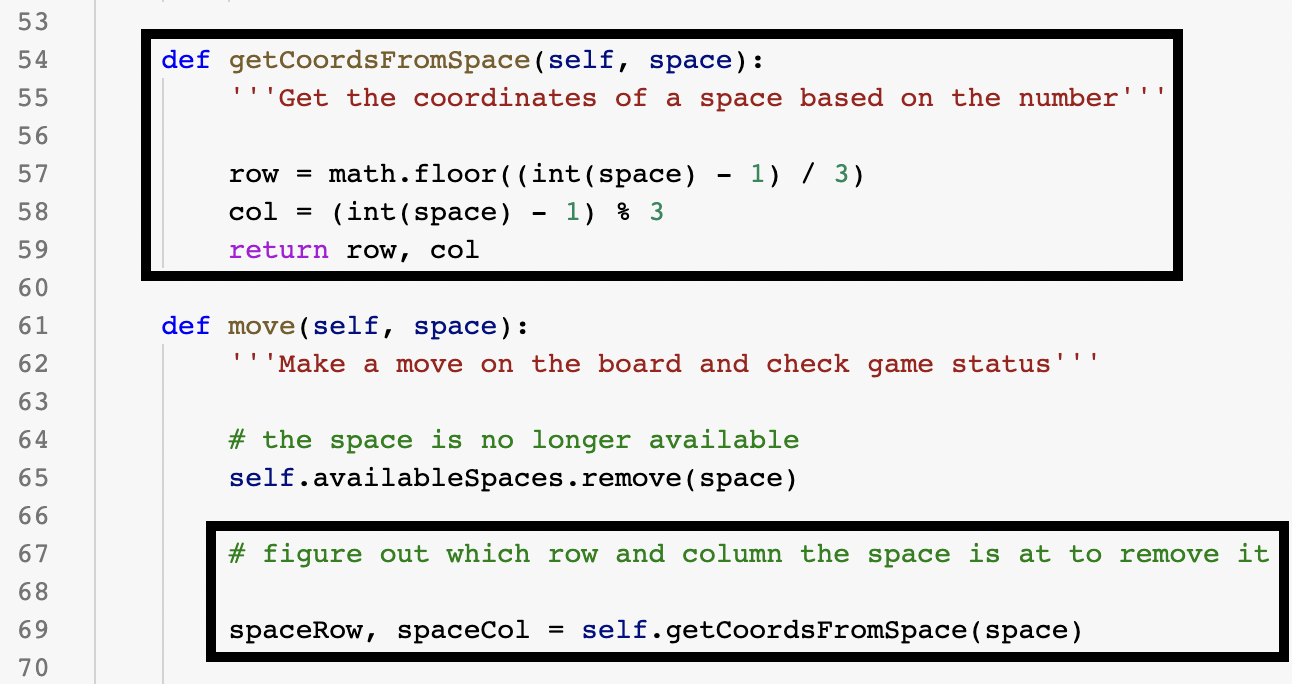

# Lambda Expressions

A lambda expression is a shorter version of a function that only has parameters and a return statement.

In [ ]:
# lambda expression
x = lambda a, b : a * b

# lambda expression as a function
def y(a, b):
    return a * b

print(x(3, 4))
print(y(3, 4))

12
12


# Review

Write a function such that it can accept a variable length of argument and print the sum of all the 2-digit numbers.

In [ ]:
def func1(*args):
    sum = 0
    for i in args:
        if i >= 10 and i < 100:
            sum += i
    return sum

Create a function `showEmployee()` in such a way that it should accept employee name (string), and its salary (integer) and display both. If the salary is missing in the function call assign default value 9000 to salary.

In [ ]:
def showEmployee(name, salary=9000):
    print("Employee:", name, "\nSalary:", salary)

showEmployee("Ben", 9000)
showEmployee("Ben")

Employee: Ben 
Salary: 9000
Employee: Ben 
Salary: 9000


Write a function with 3 parameters, x, y, and z. Return x + y * z.

In [ ]:
def func1(x, y, z):
    return x + y * z

func1(1, 2, 3)

7

Write the same function but as a lambda expression.

In [ ]:
a = lambda x, y, z: x + y * z